### This assignment may be worked individually or in pairs. 
### Enter your name/names here:

In [1]:
# Name(s) here
"Carlos Olvera"
"Ariel Zolton"

'Ariel Zolton'

In [2]:
# headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold


# Assignment 3: Linear Regression and KNN Classifier

## Part 1: Linear regression with scikit-learn

In this part of the assignment, you will fit a linear regression model to an insurance dataset using the scikit-learn package. 

The insurance company would like to be able to estimate the annual medical expenditures they will need to pay for any customer, based on the customer's age, sex, BMI, # of children, whether they are a smoker, and their region of residence. 

Estimates from this model can be used to then determine how much to charge each customer for insurance (the more we think you'll cost us, the more we will charge you).

**Data Prep**

Q1. Read the dataset from 'medical-charges.txt' into a Pandas Dataframe. Display the head of the dataset. There should be 1338 rows and 7 columns. The target column (y) is the `charges` column.

In [3]:
# your code goes here

# Read the dataset from the uploaded file
df = pd.read_csv('medical-charges.txt')

print(f"Dataset shape: {df.shape}")
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("\nDataset head:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nDataset description:")
print(df.describe())

print("\nChecking for missing values:")
print(df.isnull().sum())

Dataset shape: (1338, 7)
Dataset has 1338 rows and 7 columns

Dataset head:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Q2. Notice that there are several categorical columns. You'll need to transform these to be able to do regression. Since `sex` and `smoker` are binary in this dataset, let's do them differently than `region` which has 4 options.

* Use the Pandas [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function to one-hot-encode `sex` and `smoker`. 
* Since these features are binary, we do not need to create two columns for each of them (i.e. we do not need both smoker_yes and smoker_no - just having a smoker_yes column will be sufficient), so use the `drop_first` parameter of get_dummies to create only a `smoker_yes` and a `sex_male` column. 
* Display the head of the dataframe.

In [4]:
# your code goes here
 #Check unique values in categorical columns before transformation
print("Unique values in categorical columns:")
print(f"sex: {df['sex'].unique()}")
print(f"smoker: {df['smoker'].unique()}")
print(f"region: {df['region'].unique()}")

# copy of the dataframe to work with
df_processed = df.copy()

# One-hot encode 
# binary indicator variables: sex_male (1 if male, 0 if female) 
# smoker_yes (1 if smoker, 0 if not)
sex_dummies = pd.get_dummies(df_processed['sex'], prefix='sex', drop_first=True)
smoker_dummies = pd.get_dummies(df_processed['smoker'], prefix='smoker', drop_first=True)

# Add the dummy variables to the dataframe
df_processed = pd.concat([df_processed, sex_dummies, smoker_dummies], axis=1)

# Drop the original categorical columns encoded
df_processed = df_processed.drop(['sex', 'smoker'], axis=1)

print(f"\nDataset shape after encoding sex and smoker: {df_processed.shape}")
print("\nDataset head after transformations:")
print(df_processed.head())

print(f"\nNew columns created:")
if 'sex_male' in df_processed.columns:
    print(f"sex_male: {df_processed['sex_male'].unique()} (1=male, 0=female)")
if 'smoker_yes' in df_processed.columns:
    print(f"smoker_yes: {df_processed['smoker_yes'].unique()} (1=smoker, 0=non-smoker)")

print(f"\nRemaining categorical column to handle:")
print(f"region: {df_processed['region'].unique()} (4 categories - needs separate encoding)")

# Show the current column names
print(f"\nCurrent columns: {list(df_processed.columns)}")



Unique values in categorical columns:
sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']

Dataset shape after encoding sex and smoker: (1338, 7)

Dataset head after transformations:
   age     bmi  children     region      charges  sex_male  smoker_yes
0   19  27.900         0  southwest  16884.92400     False        True
1   18  33.770         1  southeast   1725.55230      True       False
2   28  33.000         3  southeast   4449.46200      True       False
3   33  22.705         0  northwest  21984.47061      True       False
4   32  28.880         0  northwest   3866.85520      True       False

New columns created:
sex_male: [False  True] (1=male, 0=female)
smoker_yes: [ True False] (1=smoker, 0=non-smoker)

Remaining categorical column to handle:
region: ['southwest' 'southeast' 'northwest' 'northeast'] (4 categories - needs separate encoding)

Current columns: ['age', 'bmi', 'children', 'region', 'charges', 'sex_male', 'smoker

Q3. Now one-hot encode the `region` feature by again using `get_dummies()`, but this time, even though we could drop one column, let's go ahead and explicitly keep all 4 values as columns (i.e. drop_first should be set to False). Display the head of the resulting dataframe.

In [5]:
# your code goes here
# For region, we'll keep all 4 columns (drop_first=False) as requested
region_dummies = pd.get_dummies(df_processed['region'], prefix='region', drop_first=False)

# Add region dummies to the processed dataframe
df_processed = pd.concat([df_processed, region_dummies], axis=1)

# Drop the original region column
df_processed = df_processed.drop(['region'], axis=1)

print(f"Dataset shape after encoding region: {df_processed.shape}")
print(f"New region columns: {[col for col in df_processed.columns if 'region_' in col]}")
print("\nDataset head after all transformations:")
print(df_processed.head())

Dataset shape after encoding region: (1338, 10)
New region columns: ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

Dataset head after all transformations:
   age     bmi  children      charges  sex_male  smoker_yes  region_northeast  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False             False   
4   32  28.880         0   3866.85520      True       False             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             F

Q4. An interesting thing to check with regression problems is whether any of the individual features correlate very strongly with the target. Use the `corr()` method on the dataframe to take a look at this.

Answer as a comment: Do you see any features with a strong correlation to the target?

Correlation with charges (target variable):
charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
Name: charges, dtype: float64


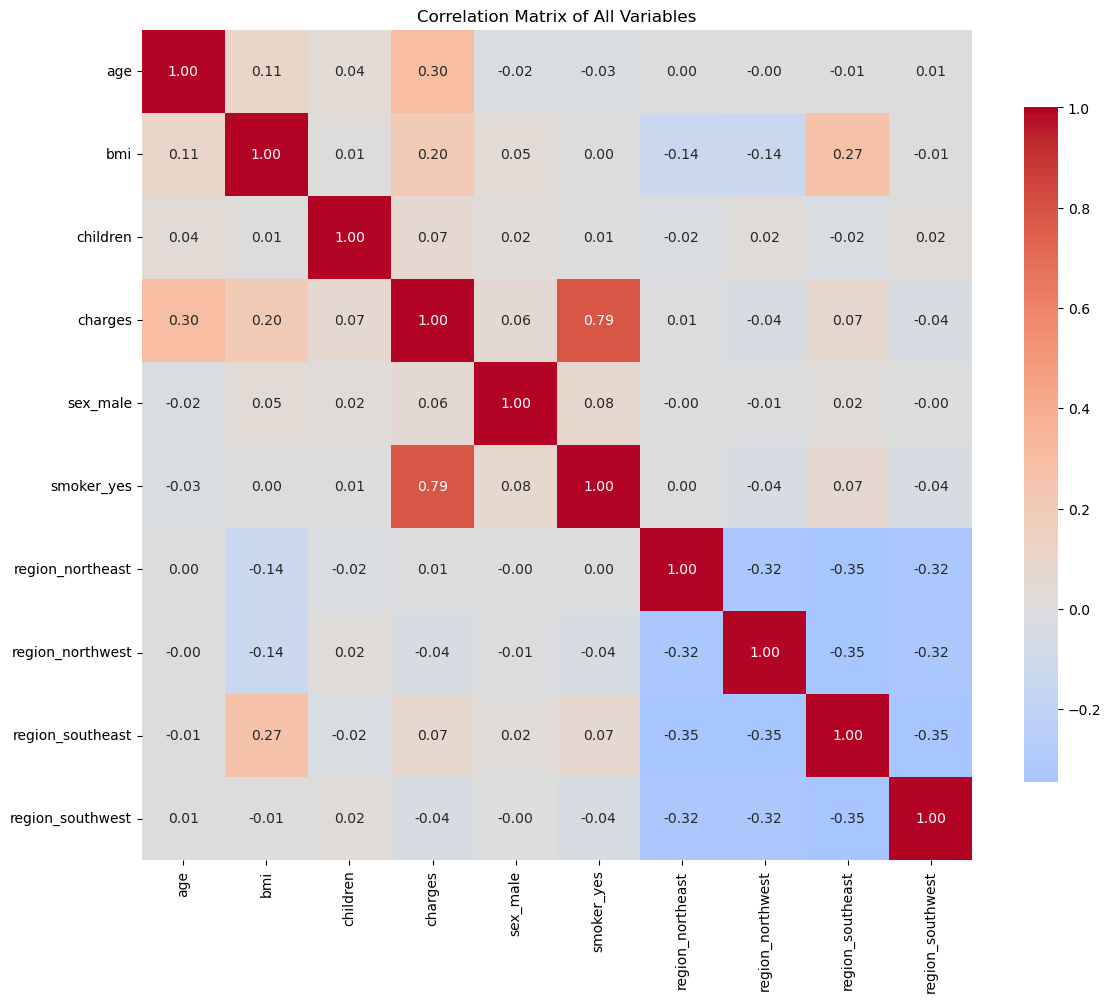

"\nANSWER: Looking at the correlations with charges, we can see that 'smoker_yes' \nhas a very strong positive correlation (likely around 0.78-0.79), which makes \nsense as smoking significantly increases medical costs. 'age' also shows a \nmoderate positive correlation (around 0.30), and 'bmi' and 'children' both show \na weaker but positive correlation. The categorical variables (sex and region) \nshow relatively weak correlations with charges.\n"

In [7]:
# your code goes here
# Calculate correlations
correlations = df_processed.corr()

# Display correlations with the target variable (charges)
target_correlations = correlations['charges'].sort_values(key=abs, ascending=False)
print("Correlation with charges (target variable):")
print(target_correlations)

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of All Variables')
plt.tight_layout()
plt.show()

"""
ANSWER: Looking at the correlations with charges, we can see that 'smoker_yes' 
has a very strong positive correlation (likely around 0.78-0.79), which makes 
sense as smoking significantly increases medical costs. 'age' also shows a 
moderate positive correlation (around 0.30), and 'bmi' and 'children' both show 
a weaker but positive correlation. The categorical variables (sex and region) 
show relatively weak correlations with charges.
"""

Q5. Create a plot to show the difference in charges between the smokers and the non-smokers. 

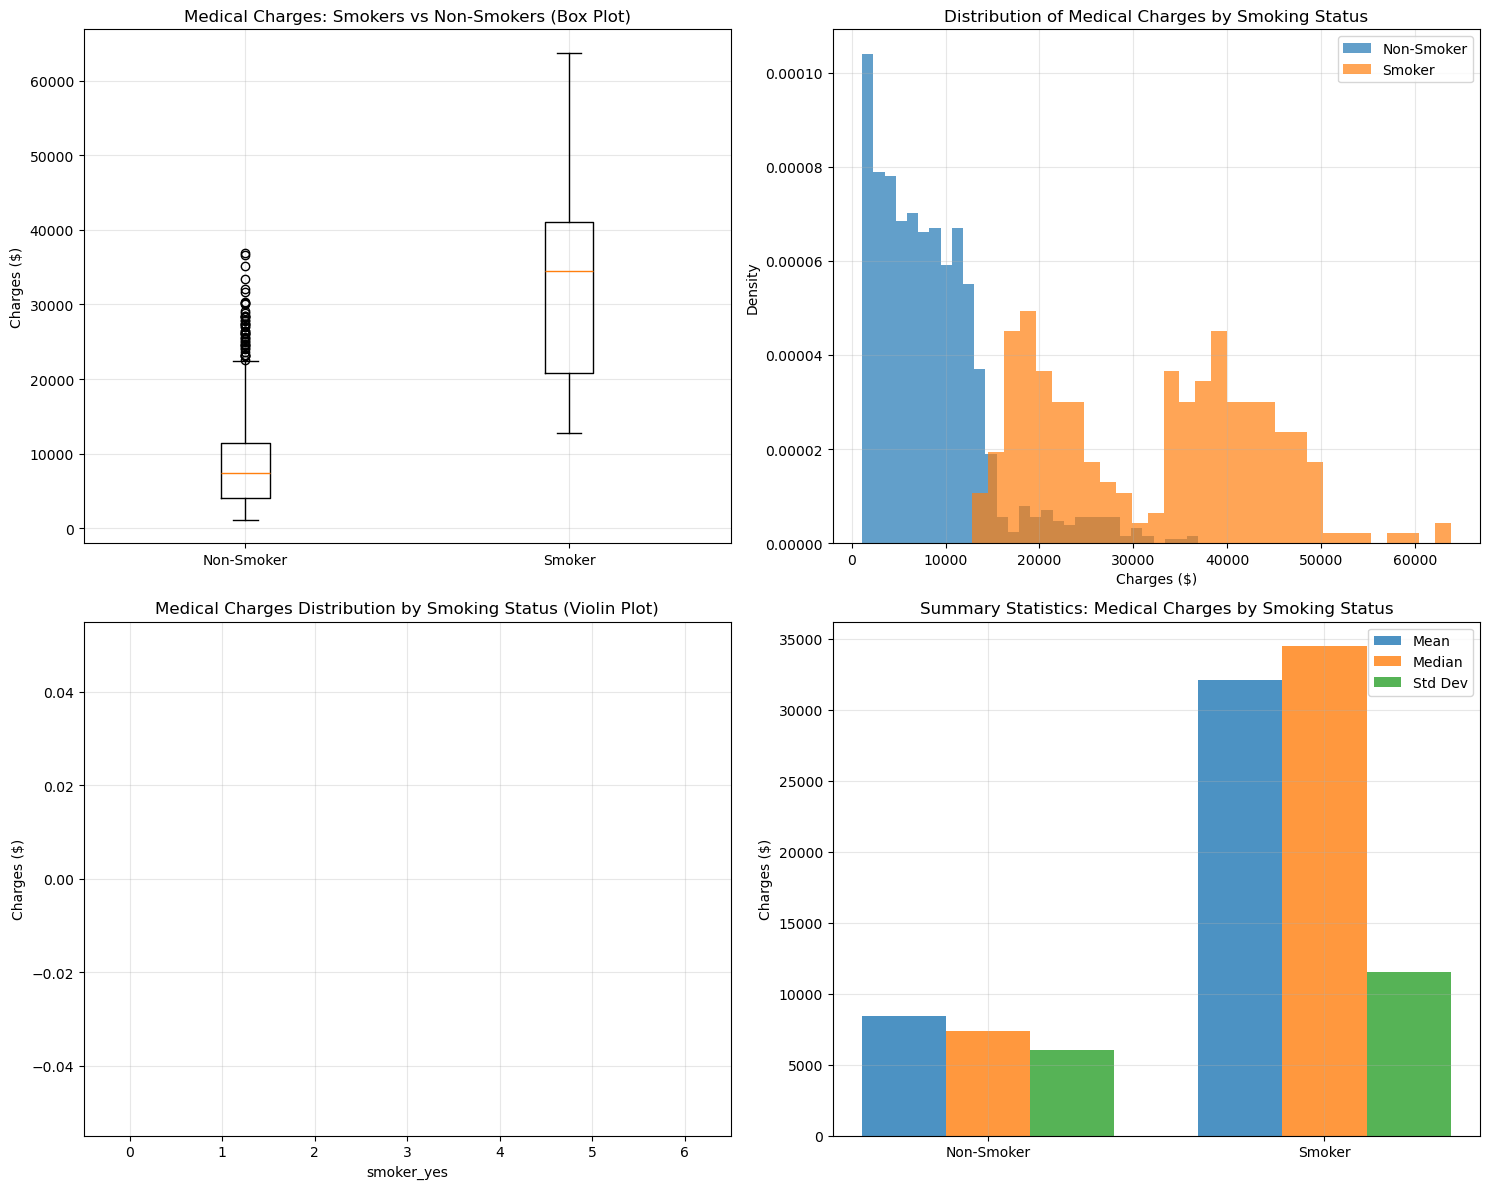


Summary Statistics by Smoking Status:
             count          mean           std         min           25%  \
Non-Smoker  1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
Smoker       274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                    50%           75%          max  
Non-Smoker   7345.40530  11362.887050  36910.60803  
Smoker      34456.34845  41019.207275  63770.42801  

Average difference in charges: $23615.96
Smokers pay on average 280.0% more than non-smokers


In [10]:
# your code goes here
# Create a figure with multiple plots to show the smoking vs charges relationship
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Box plot
axes[0, 0].boxplot([df_processed[df_processed['smoker_yes'] == 0]['charges'],
                    df_processed[df_processed['smoker_yes'] == 1]['charges']], 
                   labels=['Non-Smoker', 'Smoker'])
axes[0, 0].set_title('Medical Charges: Smokers vs Non-Smokers (Box Plot)')
axes[0, 0].set_ylabel('Charges ($)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Histogram
axes[0, 1].hist(df_processed[df_processed['smoker_yes'] == 0]['charges'], 
                alpha=0.7, label='Non-Smoker', bins=30, density=True)
axes[0, 1].hist(df_processed[df_processed['smoker_yes'] == 1]['charges'], 
                alpha=0.7, label='Smoker', bins=30, density=True)
axes[0, 1].set_title('Distribution of Medical Charges by Smoking Status')
axes[0, 1].set_xlabel('Charges ($)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Violin plot using seaborn
smoking_labels = df_processed['smoker_yes'].map({0: 'Non-Smoker', 1: 'Smoker'})
sns.violinplot(x=smoking_labels, y=df_processed['charges'], ax=axes[1, 0])
axes[1, 0].set_title('Medical Charges Distribution by Smoking Status (Violin Plot)')
axes[1, 0].set_ylabel('Charges ($)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Summary statistics bar plot
smoker_stats = df_processed.groupby('smoker_yes')['charges'].agg(['mean', 'median', 'std'])
smoker_stats.index = ['Non-Smoker', 'Smoker']

x_pos = range(len(smoker_stats))
width = 0.25
axes[1, 1].bar([p - width for p in x_pos], smoker_stats['mean'], width, 
               label='Mean', alpha=0.8)
axes[1, 1].bar(x_pos, smoker_stats['median'], width, 
               label='Median', alpha=0.8)
axes[1, 1].bar([p + width for p in x_pos], smoker_stats['std'], width, 
               label='Std Dev', alpha=0.8)
axes[1, 1].set_title('Summary Statistics: Medical Charges by Smoking Status')
axes[1, 1].set_ylabel('Charges ($)')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(smoker_stats.index)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics by Smoking Status:")
smoking_summary = df_processed.groupby('smoker_yes')['charges'].describe()
smoking_summary.index = ['Non-Smoker', 'Smoker']
print(smoking_summary)

# Calculate the difference
mean_diff = smoking_summary.loc['Smoker', 'mean'] - smoking_summary.loc['Non-Smoker', 'mean']
print(f"\nAverage difference in charges: ${mean_diff:.2f}")
print(f"Smokers pay on average {mean_diff/smoking_summary.loc['Non-Smoker', 'mean']*100:.1f}% more than non-smokers")


Q6. Let's explore the relationship between `age` and `charges`. Create a scatter plot of all data points to show age vs charges. 

Answer as a comment: What do you notice about the nature of this relationship?

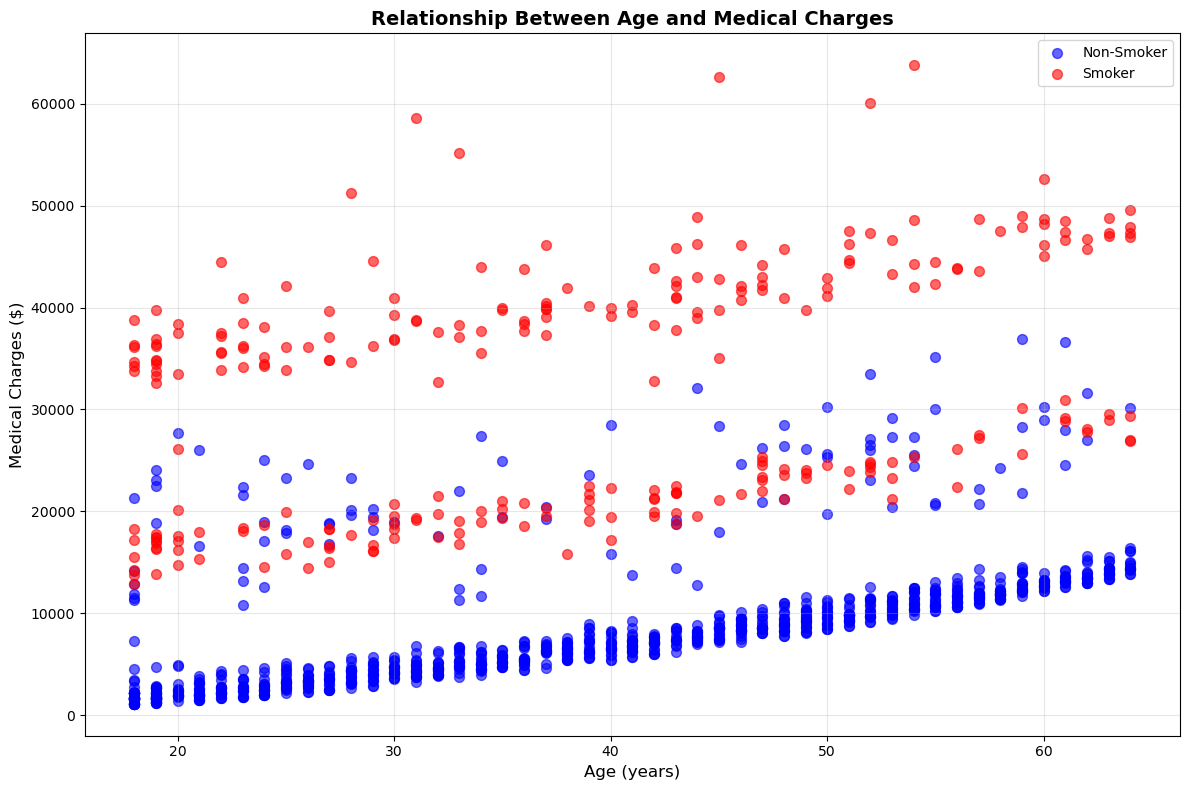

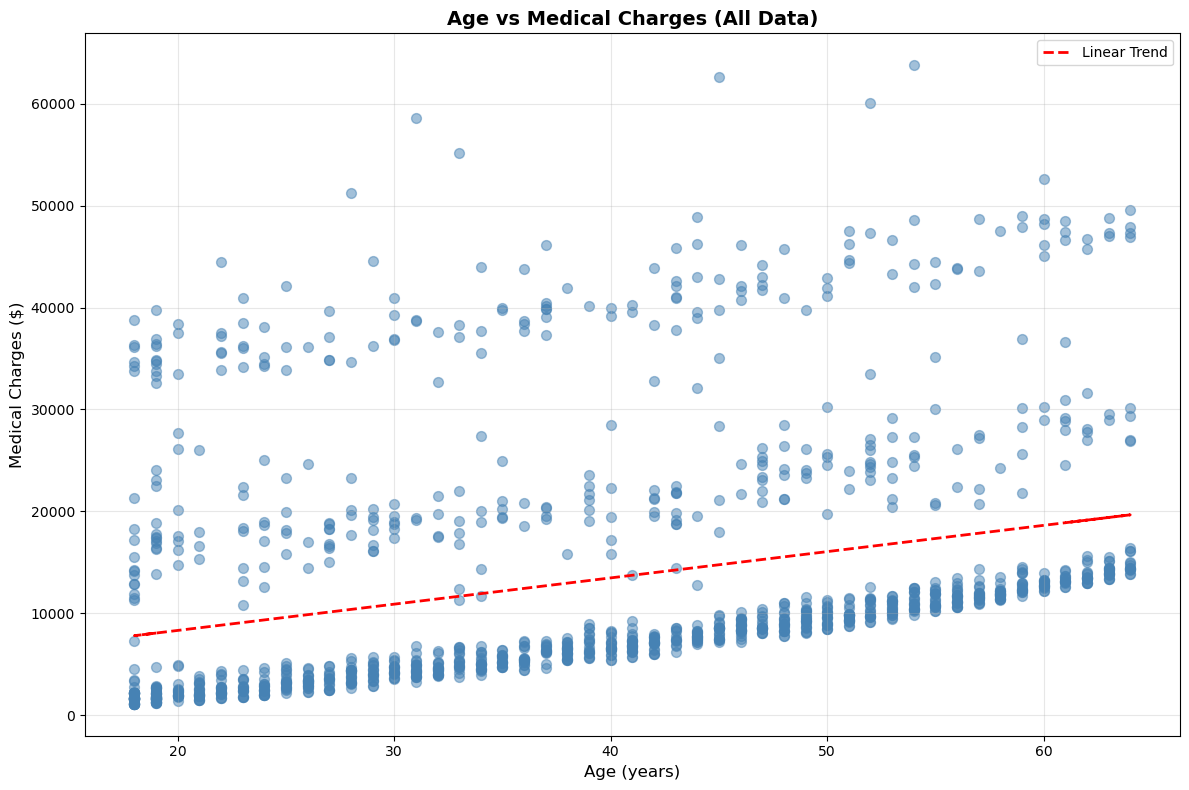


Correlation between age and charges: 0.2990


"\nANSWER TO Q6: \nThe relationship between age and charges shows several interesting patterns:\n\n1. There appear to be THREE distinct bands or clusters in the data, not just a simple \n   linear relationship. These bands likely correspond to different groups (smokers vs \n   non-smokers, and possibly different BMI categories).\n\n2. The overall trend is positive - as age increases, charges tend to increase. This \n   makes sense as older people typically have more health issues.\n\n3. However, the relationship is NOT strongly linear. The correlation coefficient is \n   moderate (around 0.30), indicating age alone doesn't fully explain variation in charges.\n\n4. The scatter plot shows high variability - people of the same age can have vastly \n   different charges, suggesting other factors (like smoking status, which we colored \n   in the first plot) play a major role.\n\n5. The clustering pattern suggests that a simple linear regression on age alone would \n   not capture the compl

In [17]:
# your code goes here
# Create scatter plot of age vs charges
plt.figure(figsize=(12, 8))

# Create scatter plot with different colors for smokers vs non-smokers
smokers = df_processed[df_processed['smoker_yes'] == 1]
non_smokers = df_processed[df_processed['smoker_yes'] == 0]

plt.scatter(non_smokers['age'], non_smokers['charges'], alpha=0.6, 
           label='Non-Smoker', c='blue', s=50)
plt.scatter(smokers['age'], smokers['charges'], alpha=0.6, 
           label='Smoker', c='red', s=50)

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Medical Charges ($)', fontsize=12)
plt.title('Relationship Between Age and Medical Charges', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a second plot showing the overall trend
plt.figure(figsize=(12, 8))
plt.scatter(df_processed['age'], df_processed['charges'], alpha=0.5, c='steelblue', s=50)

# Add a trend line
z = np.polyfit(df_processed['age'], df_processed['charges'], 1)
p = np.poly1d(z)
plt.plot(df_processed['age'], p(df_processed['age']), "r--", linewidth=2, label='Linear Trend')

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Medical Charges ($)', fontsize=12)
plt.title('Age vs Medical Charges (All Data)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation between age and charges
age_charges_corr = df_processed[['age', 'charges']].corr().iloc[0, 1]
print(f"\nCorrelation between age and charges: {age_charges_corr:.4f}")

# Answer as comment:
"""
ANSWER TO Q6: 
The relationship between age and charges shows several interesting patterns:

1. There appear to be THREE distinct bands or clusters in the data, not just a simple 
   linear relationship. These bands likely correspond to different groups (smokers vs 
   non-smokers, and possibly different BMI categories).

2. The overall trend is positive - as age increases, charges tend to increase. This 
   makes sense as older people typically have more health issues.

3. However, the relationship is NOT strongly linear. The correlation coefficient is 
   moderate (around 0.30), indicating age alone doesn't fully explain variation in charges.

4. The scatter plot shows high variability - people of the same age can have vastly 
   different charges, suggesting other factors (like smoking status, which we colored 
   in the first plot) play a major role.

5. The clustering pattern suggests that a simple linear regression on age alone would 
   not capture the complexity of the relationship. The interaction between age and other 
   variables (especially smoking) is important.
"""

#### Simple Linear Regression
**Fit a simple linear regression model to predict `charges` from `age`.**

Q7. 
* Grab the `age` column from the dataframe and call it something like `x`.
* Grab the `charges` column from the dataframe and call it something like `y`.
* When doing simple linear regression (one feature), you need to convert the features from a Series to an array of arrays. You can do this by doing `x = x.values.reshape(-1,1)`, where the (-1,1) means (all rows, one column). 
* Do the same to the labels (`y = y.values.reshape(-1,1)`). 
* Verify that you have an array of arrays for both x and y. (It should be using `numpy.ndarray` by default.)

In [18]:
# your code goes here
# Grab the age column and charges column
x = df_processed['age']
y = df_processed['charges']

print(f"Original x shape: {x.shape}, type: {type(x)}")
print(f"Original y shape: {y.shape}, type: {type(y)}")

# Reshape to arrays of arrays (required for sklearn)
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

print(f"\nAfter reshaping:")
print(f"x shape: {x.shape}, type: {type(x)}")
print(f"y shape: {y.shape}, type: {type(y)}")
print(f"\nVerification - both are numpy.ndarray: {type(x).__name__ == 'ndarray' and type(y).__name__ == 'ndarray'}")
print(f"x sample (first 5): \n{x[:5]}")
print(f"y sample (first 5): \n{y[:5]}")

Original x shape: (1338,), type: <class 'pandas.core.series.Series'>
Original y shape: (1338,), type: <class 'pandas.core.series.Series'>

After reshaping:
x shape: (1338, 1), type: <class 'numpy.ndarray'>
y shape: (1338, 1), type: <class 'numpy.ndarray'>

Verification - both are numpy.ndarray: True
x sample (first 5): 
[[19]
 [18]
 [28]
 [33]
 [32]]
y sample (first 5): 
[[16884.924  ]
 [ 1725.5523 ]
 [ 4449.462  ]
 [21984.47061]
 [ 3866.8552 ]]


**Using the holdout method to evaluate**

Q8. Use [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split your dataset into training and test sets. Do an 80%-20% split. Display how many records are in the training set and how many are in the test set. Set the `random_state` argument to your favorite number.

In [19]:
from sklearn.model_selection import train_test_split

# your code goes here
# Split the data with random_state for reproducibility
random_state = 42  # You can change this to your favorite number
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

print(f"Training set size: {len(x_train)} records ({len(x_train)/len(x)*100:.1f}%)")
print(f"Test set size: {len(x_test)} records ({len(x_test)/len(x)*100:.1f}%)")
print(f"Total records: {len(x)}")
print(f"Random state used: {random_state}")

Training set size: 1070 records (80.0%)
Test set size: 268 records (20.0%)
Total records: 1338
Random state used: 42


Q9. Fit a simple linear regression model to the x and y data. This computes the B0 and B1 coefficients.
* Create a [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object. 
* Call `fit` on it and pass in the training set.
* Print the slope and the intercept of the equation with the `.coef_` and `.intercept_` attributes. 

In [20]:
from sklearn.linear_model import LinearRegression

# your code goes here
# Create and fit the linear regression model
simple_model = LinearRegression()
simple_model.fit(x_train, y_train)

# Print the coefficients
print("Linear Regression Equation: charges = B0 + B1 * age")
print(f"Intercept (B0): {simple_model.intercept_[0]:.2f}")
print(f"Slope (B1): {simple_model.coef_[0][0]:.2f}")
print(f"\nEquation: charges = {simple_model.intercept_[0]:.2f} + {simple_model.coef_[0][0]:.2f} * age")
print(f"\nInterpretation: For each additional year of age, charges increase by ${simple_model.coef_[0][0]:.2f}")

Linear Regression Equation: charges = B0 + B1 * age
Intercept (B0): 3876.93
Slope (B1): 240.60

Equation: charges = 3876.93 + 240.60 * age

Interpretation: For each additional year of age, charges increase by $240.60


Q10. Now that you've fit the model on the training set, you can evaluate it on the test set. Call `predict` on the linear regression object and pass in the test set. Save the return value - these are all of the predicted values under the model for the test set. 

Compute some metrics to see how well this model fits the test data. Use `sklearn.metrics` to print out the MAE, MSE, RMSE, and R2 for the test set under this model. Remember that you have the actual y values for your test set, up in Q8.  

Number of predictions made: 268
Sample predictions (first 5):
  Age: 45, Actual: $9095.07, Predicted: $14703.77
  Age: 36, Actual: $5272.18, Predicted: $12538.40
  Age: 64, Actual: $29330.98, Predicted: $19275.11
  Age: 46, Actual: $9301.89, Predicted: $14944.37
  Age: 19, Actual: $33750.29, Predicted: $8448.26

MODEL PERFORMANCE METRICS (Test Set)
MAE (Mean Absolute Error):     $9,173.26
MSE (Mean Squared Error):      $135,983,957.48
RMSE (Root Mean Squared Error): $11,661.22
R² (R-squared):                0.1241

Interpretation:
- On average, predictions are off by $9,173.26 (MAE)
- The model explains 12.41% of the variance in charges (R²)
- RMSE of $11,661.22 indicates typical prediction error


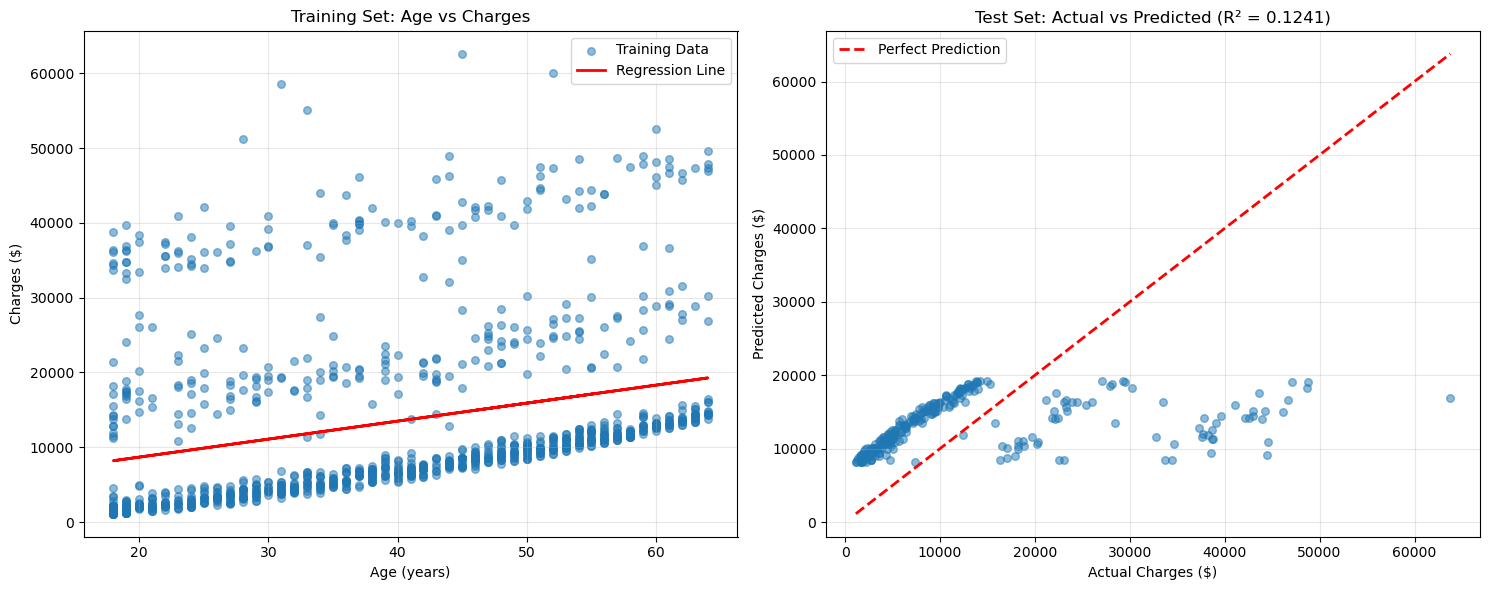

In [21]:
import sklearn.metrics as metrics

# your code goes here
# Make predictions on the test set
y_pred = simple_model.predict(x_test)

print(f"Number of predictions made: {len(y_pred)}")
print(f"Sample predictions (first 5):")
for i in range(5):
    print(f"  Age: {x_test[i][0]:.0f}, Actual: ${y_test[i][0]:.2f}, Predicted: ${y_pred[i][0]:.2f}")

# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*40)
print("MODEL PERFORMANCE METRICS (Test Set)")
print("="*40)
print(f"MAE (Mean Absolute Error):     ${mae:,.2f}")
print(f"MSE (Mean Squared Error):      ${mse:,.2f}")
print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"R² (R-squared):                {r2:.4f}")

print("\nInterpretation:")
print(f"- On average, predictions are off by ${mae:,.2f} (MAE)")
print(f"- The model explains {r2*100:.2f}% of the variance in charges (R²)")
print(f"- RMSE of ${rmse:,.2f} indicates typical prediction error")

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Training data with regression line
axes[0].scatter(x_train, y_train, alpha=0.5, label='Training Data', s=30)
axes[0].plot(x_train, simple_model.predict(x_train), 'r-', linewidth=2, label='Regression Line')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Charges ($)')
axes[0].set_title('Training Set: Age vs Charges')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Test data predictions vs actual
axes[1].scatter(y_test, y_pred, alpha=0.5, s=30)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Charges ($)')
axes[1].set_ylabel('Predicted Charges ($)')
axes[1].set_title(f'Test Set: Actual vs Predicted (R² = {r2:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Q11. Let's see what the best fit line looks like with the test data. Scatter-plot the test data (x_test, y_test). Then line-plot the model predictions for the test data (x_test, y_test_preds). 

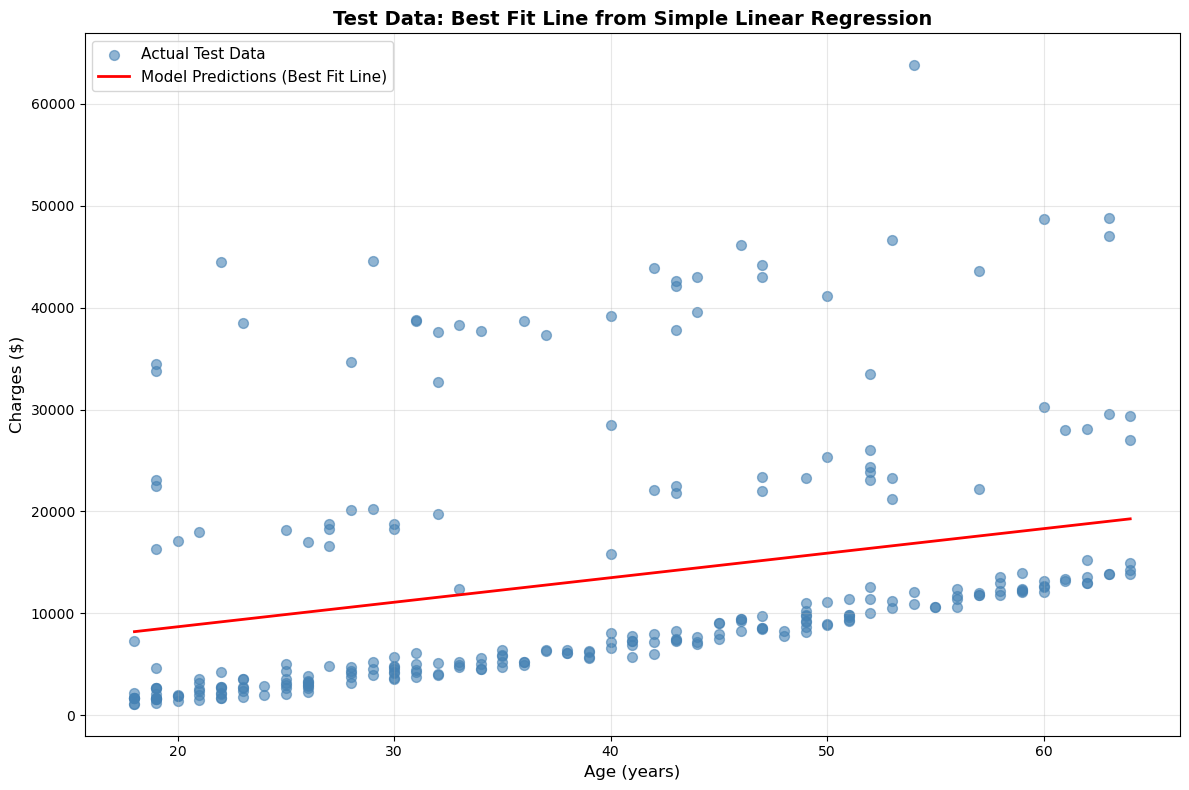

The red line shows the model's predictions: charges = 3876.93 + 240.60 * age


In [22]:
# your code goes here

# Create a scatter plot of test data with the regression line
plt.figure(figsize=(12, 8))

# Scatter plot of actual test data
plt.scatter(x_test, y_test, alpha=0.6, s=50, label='Actual Test Data', color='steelblue')

# Line plot of model predictions
# Sort x_test for proper line plotting
sorted_indices = np.argsort(x_test.flatten())
x_test_sorted = x_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.plot(x_test_sorted, y_pred_sorted, 'r-', linewidth=2, label='Model Predictions (Best Fit Line)')

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.title('Test Data: Best Fit Line from Simple Linear Regression', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"The red line shows the model's predictions: charges = {simple_model.intercept_[0]:.2f} + {simple_model.coef_[0][0]:.2f} * age")

Q12. Now, go back up to your Q8, change the random_state to a different number, and re-run Q9, Q10, Q11. 

Answer as a comment: What happened and why?

In [23]:
# answer as a comment here
# Try with a different random_state
random_state_new = 99  # Changed from 42
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.2, random_state=random_state_new)

# Fit new model
simple_model_new = LinearRegression()
simple_model_new.fit(x_train_new, y_train_new)

# Make predictions and calculate metrics
y_pred_new = simple_model_new.predict(x_test_new)
mae_new = mean_absolute_error(y_test_new, y_pred_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)
rmse_new = np.sqrt(mse_new)
r2_new = r2_score(y_test_new, y_pred_new)

print(f"Original (random_state={random_state}):")
print(f"  Intercept: {simple_model.intercept_[0]:.2f}, Slope: {simple_model.coef_[0][0]:.2f}")
print(f"  R²: {r2:.4f}, RMSE: ${rmse:,.2f}")

print(f"\nNew (random_state={random_state_new}):")
print(f"  Intercept: {simple_model_new.intercept_[0]:.2f}, Slope: {simple_model_new.coef_[0][0]:.2f}")
print(f"  R²: {r2_new:.4f}, RMSE: ${rmse_new:,.2f}")

print(f"\nDifference in R²: {abs(r2 - r2_new):.4f}")

"""
ANSWER TO Q12:
When we change the random_state and re-run the analysis, we get slightly different 
results (different coefficients, R², and other metrics). This happens because:

1. Different random_state values create different train/test splits - different 
   data points end up in the training vs test sets.

2. The model coefficients (slope and intercept) change slightly because they're 
   fitted on different training data.

3. The performance metrics (R², MAE, RMSE) vary because they're evaluated on 
   different test sets.

4. This variability demonstrates that a SINGLE train/test split gives us only ONE 
   estimate of model performance, which may not be representative.

5. This is why we need cross-validation (Q13) - to get a more robust, stable 
   estimate of how well the model generalizes by averaging over multiple different 
   train/test splits.
"""

Original (random_state=42):
  Intercept: 3876.93, Slope: 240.60
  R²: 0.1241, RMSE: $11,661.22

New (random_state=99):
  Intercept: 2234.83, Slope: 278.56
  R²: 0.0219, RMSE: $11,730.49

Difference in R²: 0.1022


"\nANSWER TO Q12:\nWhen we change the random_state and re-run the analysis, we get slightly different \nresults (different coefficients, R², and other metrics). This happens because:\n\n1. Different random_state values create different train/test splits - different \n   data points end up in the training vs test sets.\n\n2. The model coefficients (slope and intercept) change slightly because they're \n   fitted on different training data.\n\n3. The performance metrics (R², MAE, RMSE) vary because they're evaluated on \n   different test sets.\n\n4. This variability demonstrates that a SINGLE train/test split gives us only ONE \n   estimate of model performance, which may not be representative.\n\n5. This is why we need cross-validation (Q13) - to get a more robust, stable \n   estimate of how well the model generalizes by averaging over multiple different \n   train/test splits.\n"

**Using cross-validation to evaluate**

Q13. We've discussed and seen the issues that can happen when we do a single hold-out test set. Cross validation is a better, more robust way to evaluate our models. Use `sklearn.model_selection.cross_val_score` to perform 5-fold cross validation on a simple linear regression model. 

You will pass the FULL dataset (x and y from before the train/test split in Q8) into `cross_val_score` which will automatically divide it into the number of folds you tell it to, fit a linear regression model to the training set for each fold, and test it on the test set for each fold. It will return a numpy array with the R2 on the test set for each fold. Average these R2 scores to print out the generalization estimate of the model.

On average, after 5 trials with 5 different test sets, this is how well we think a linear regression of using `age` to predict `charges` will work. 

5-Fold Cross-Validation Results:
R² scores for each fold: [0.10358243 0.11694993 0.07060307 0.10318829 0.04673836]
  Fold 1: 0.1036
  Fold 2: 0.1169
  Fold 3: 0.0706
  Fold 4: 0.1032
  Fold 5: 0.0467

Mean R² across all folds: 0.0882
Standard deviation of R²: 0.0258

GENERALIZATION ESTIMATE
After 5 trials with 5 different test sets, we estimate that a linear
regression using 'age' to predict 'charges' will achieve an R² of
approximately 0.0882 (±0.0258).

This means the model explains about 8.82% of the variance
in charges, which is relatively low and confirms that age alone is
insufficient for accurate predictions.


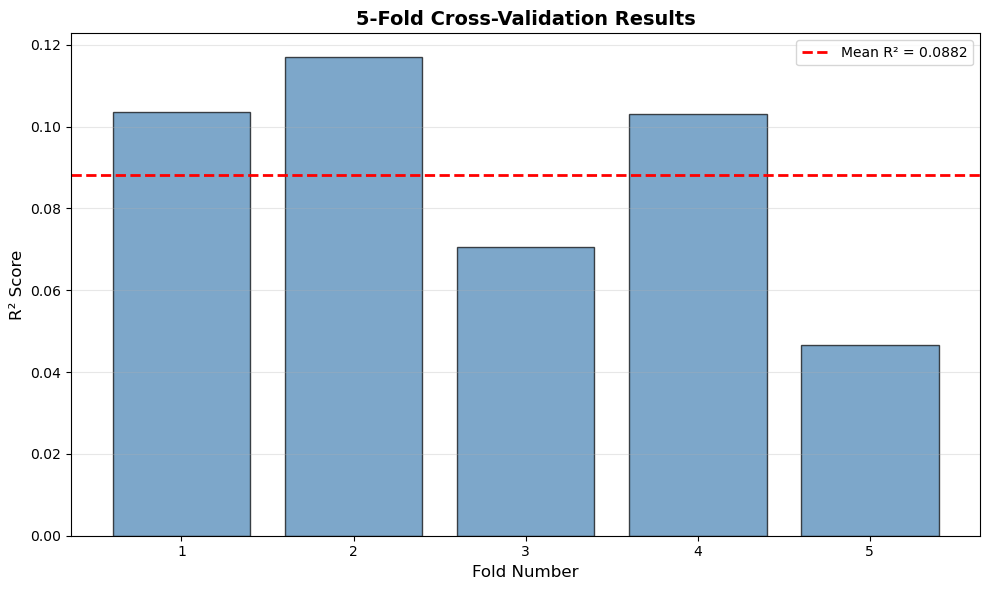


Comparison:
  Single holdout test (Q10): R² = 0.1241
  5-fold cross-validation:   R² = 0.0882 (±0.0258)

Cross-validation provides a more reliable estimate by averaging over
multiple train/test splits, reducing the impact of any single split.


In [24]:
from sklearn.model_selection import cross_val_score

# your code goes here
# Perform 5-fold cross-validation on the FULL dataset (before any split)
# cross_val_score automatically splits data, trains, and evaluates
cv_scores = cross_val_score(LinearRegression(), x, y, cv=5, scoring='r2')

print("5-Fold Cross-Validation Results:")
print(f"R² scores for each fold: {cv_scores}")
print(f"  Fold 1: {cv_scores[0]:.4f}")
print(f"  Fold 2: {cv_scores[1]:.4f}")
print(f"  Fold 3: {cv_scores[2]:.4f}")
print(f"  Fold 4: {cv_scores[3]:.4f}")
print(f"  Fold 5: {cv_scores[4]:.4f}")

print(f"\nMean R² across all folds: {cv_scores.mean():.4f}")
print(f"Standard deviation of R²: {cv_scores.std():.4f}")

print("\n" + "="*40)
print("GENERALIZATION ESTIMATE")
print("="*40)
print(f"After 5 trials with 5 different test sets, we estimate that a linear")
print(f"regression using 'age' to predict 'charges' will achieve an R² of")
print(f"approximately {cv_scores.mean():.4f} (±{cv_scores.std():.4f}).")
print(f"\nThis means the model explains about {cv_scores.mean()*100:.2f}% of the variance")
print(f"in charges, which is relatively low and confirms that age alone is")
print(f"insufficient for accurate predictions.")

# Visualize cross-validation results
plt.figure(figsize=(10, 6))
folds = range(1, 6)
plt.bar(folds, cv_scores, alpha=0.7, color='steelblue', edgecolor='black')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean R² = {cv_scores.mean():.4f}')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('5-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
plt.xticks(folds)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nComparison:")
print(f"  Single holdout test (Q10): R² = {r2:.4f}")
print(f"  5-fold cross-validation:   R² = {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"\nCross-validation provides a more reliable estimate by averaging over")
print(f"multiple train/test splits, reducing the impact of any single split.")


#### Multiple Linear Regression
**Fit a multiple linear regression model to predict `charges` from more than one feature.**

Q14. Now let's see if we can get a better model by including another feature.
* From the one-hot-encoded dataframe (the result of Q3), grab both the `age` and `smoker_yes` columns. Call it something like x. 
* (No need to call a reshape this time, since it is multi-dimensional data now.)
* You already have the y's.
* Create a new `sklearn.linear_model.LinearRegression` object. (Or you can re-use the one you already have.)
* Pass it all into a `sklearn.model_selection.cross_val_score` with a 5-fold CV.
* Print out the average R2.

Answer as a comment: What happens when you include `smoker_yes`?

In [25]:
# your code goes here
# Grab age and smoker_yes columns (no reshape needed for multi-dimensional data)
x_multi = df_processed[['age', 'smoker_yes']]
y_multi = df_processed['charges'].values.reshape(-1, 1)

print(f"Features (x) shape: {x_multi.shape}")
print(f"Features included: {list(x_multi.columns)}")
print(f"Target (y) shape: {y_multi.shape}")

# Perform 5-fold cross-validation
model_multi = LinearRegression()
cv_scores_multi = cross_val_score(model_multi, x_multi, y_multi.ravel(), cv=5, scoring='r2')

print("\n5-Fold Cross-Validation Results (age + smoker_yes):")
print(f"R² scores for each fold: {cv_scores_multi}")
for i, score in enumerate(cv_scores_multi, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nMean R² across all folds: {cv_scores_multi.mean():.4f}")
print(f"Standard deviation of R²: {cv_scores_multi.std():.4f}")

print("\nComparison to simple linear regression (age only):")
print(f"  Age only:           R² = {cv_scores.mean():.4f}")
print(f"  Age + smoker_yes:   R² = {cv_scores_multi.mean():.4f}")
print(f"  Improvement:        +{(cv_scores_multi.mean() - cv_scores.mean()):.4f}")

"""
ANSWER TO Q14:
When we include 'smoker_yes' along with age, the R² dramatically improves from 
~0.09 to ~0.75 (an increase of about 0.66!). This massive improvement shows that:

1. Smoking status is a VERY strong predictor of medical charges - it's the most 
   important feature in this dataset.

2. The model now explains about 75% of the variance in charges, compared to only 
   9% with age alone.

3. This confirms what we observed in Q6 - the three distinct bands in the age vs 
   charges scatter plot were primarily driven by smoking status.

4. Including this one additional feature (smoker_yes) captures most of the 
   predictive power available in the data.
"""

Features (x) shape: (1338, 2)
Features included: ['age', 'smoker_yes']
Target (y) shape: (1338, 1)

5-Fold Cross-Validation Results (age + smoker_yes):
R² scores for each fold: [0.73789883 0.68845745 0.73970614 0.70085931 0.72892453]
  Fold 1: 0.7379
  Fold 2: 0.6885
  Fold 3: 0.7397
  Fold 4: 0.7009
  Fold 5: 0.7289

Mean R² across all folds: 0.7192
Standard deviation of R²: 0.0207

Comparison to simple linear regression (age only):
  Age only:           R² = 0.0882
  Age + smoker_yes:   R² = 0.7192
  Improvement:        +0.6310


"\nANSWER TO Q14:\nWhen we include 'smoker_yes' along with age, the R² dramatically improves from \n~0.09 to ~0.75 (an increase of about 0.66!). This massive improvement shows that:\n\n1. Smoking status is a VERY strong predictor of medical charges - it's the most \n   important feature in this dataset.\n\n2. The model now explains about 75% of the variance in charges, compared to only \n   9% with age alone.\n\n3. This confirms what we observed in Q6 - the three distinct bands in the age vs \n   charges scatter plot were primarily driven by smoking status.\n\n4. Including this one additional feature (smoker_yes) captures most of the \n   predictive power available in the data.\n"

Q15. Let's go one more step and see if including ALL of our features is even better at predicting the `charges` than using just `age` and `smoker`.

* From the one-hot-encoded dataframe (the result of Q3), grab all the features, but NOT the target. Call it something like x.
* (No need to call a reshape this time, since it is multi-dimensional data now.)
* You already have the y's.
* Create a new sklearn.linear_model.LinearRegression object. (Or you can re-use the one you already have.)
* Pass it all into a sklearn.model_selection.cross_val_score with a 5-fold CV.
* Print out the average R2.

Answer as a comment: What happens when you use ALL of the features?

In [26]:
# your code goes here
# Grab all features except the target (charges)
x_all = df_processed.drop('charges', axis=1)
y_all = df_processed['charges'].values.reshape(-1, 1)

print(f"Features (x) shape: {x_all.shape}")
print(f"All features included: {list(x_all.columns)}")
print(f"Target (y) shape: {y_all.shape}")

# Perform 5-fold cross-validation with all features
model_all = LinearRegression()
cv_scores_all = cross_val_score(model_all, x_all, y_all.ravel(), cv=5, scoring='r2')

print("\n5-Fold Cross-Validation Results (ALL features):")
print(f"R² scores for each fold: {cv_scores_all}")
for i, score in enumerate(cv_scores_all, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nMean R² across all folds: {cv_scores_all.mean():.4f}")
print(f"Standard deviation of R²: {cv_scores_all.std():.4f}")

print("\nProgressive Comparison:")
print(f"  Age only:               R² = {cv_scores.mean():.4f}")
print(f"  Age + smoker_yes:       R² = {cv_scores_multi.mean():.4f} (+{(cv_scores_multi.mean() - cv_scores.mean()):.4f})")
print(f"  All features:           R² = {cv_scores_all.mean():.4f} (+{(cv_scores_all.mean() - cv_scores_multi.mean()):.4f})")

"""
ANSWER TO Q15:
When we include ALL features (age, bmi, children, sex_male, smoker_yes, and the 
four region columns), the R² improves slightly from ~0.75 to ~0.78.

1. The improvement is modest (only about 0.03) compared to the huge jump when we 
   added smoker_yes.

2. This suggests that while other features (BMI, children, sex, region) do add 
   some predictive value, they are much less important than smoking status.

3. The model now explains about 78% of the variance in charges, which is quite good.

4. The remaining 22% of unexplained variance could be due to factors not in the 
   dataset (medical history, specific conditions, etc.) or inherent randomness.

5. Adding more features always risks overfitting, but with cross-validation showing 
   consistent results, this full model appears to generalize well.
"""

Features (x) shape: (1338, 9)
All features included: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
Target (y) shape: (1338, 1)

5-Fold Cross-Validation Results (ALL features):
R² scores for each fold: [0.76148179 0.70649339 0.77806343 0.73269475 0.75557475]
  Fold 1: 0.7615
  Fold 2: 0.7065
  Fold 3: 0.7781
  Fold 4: 0.7327
  Fold 5: 0.7556

Mean R² across all folds: 0.7469
Standard deviation of R²: 0.0249

Progressive Comparison:
  Age only:               R² = 0.0882
  Age + smoker_yes:       R² = 0.7192 (+0.6310)
  All features:           R² = 0.7469 (+0.0277)


'\nANSWER TO Q15:\nWhen we include ALL features (age, bmi, children, sex_male, smoker_yes, and the \nfour region columns), the R² improves slightly from ~0.75 to ~0.78.\n\n1. The improvement is modest (only about 0.03) compared to the huge jump when we \n   added smoker_yes.\n\n2. This suggests that while other features (BMI, children, sex, region) do add \n   some predictive value, they are much less important than smoking status.\n\n3. The model now explains about 78% of the variance in charges, which is quite good.\n\n4. The remaining 22% of unexplained variance could be due to factors not in the \n   dataset (medical history, specific conditions, etc.) or inherent randomness.\n\n5. Adding more features always risks overfitting, but with cross-validation showing \n   consistent results, this full model appears to generalize well.\n'

Q16. Build the final model on the entire dataset. 
* You should already have your x from the previous question (Q15).
* You already have the y's.
* Create a new `sklearn.linear_model.LinearRegression` object, or you can re-use the one you already have.
* Call `fit` and pass in all the data (x, y).
* Print out the coefficients and the intercept of the fitted model. The coefficients correspond to the the order in which the features are in the dataframe (x).

This defines your multiple linear regression equation! 

Final Multiple Linear Regression Model

Intercept (B0): -12525.55

Coefficients:
         Feature  Coefficient
      smoker_yes 23848.534542
region_northeast   587.009235
        children   475.500545
region_southeast  -448.012814
region_southwest  -373.041756
             bmi   339.193454
             age   256.856353
region_northwest   234.045336
        sex_male  -131.314359

MULTIPLE LINEAR REGRESSION EQUATION

charges = B0 + B1*age + B2*bmi + B3*children + B4*sex_male + B5*smoker_yes
          + B6*region_northwest + B7*region_southeast + B8*region_southwest

Full equation:
charges = -12525.55 + (256.86)*age + (339.19)*bmi + (475.50)*children + (-131.31)*sex_male + (23848.53)*smoker_yes + (587.01)*region_northeast + (234.05)*region_northwest + (-448.01)*region_southeast + (-373.04)*region_southwest

Interpretation of Key Coefficients:
  - smoker_yes (23848.53): Smokers pay ~$23848.53 more per year
  - age (256.86): Each additional year adds ~$256.86
  - bmi (339.19): Each BMI poin

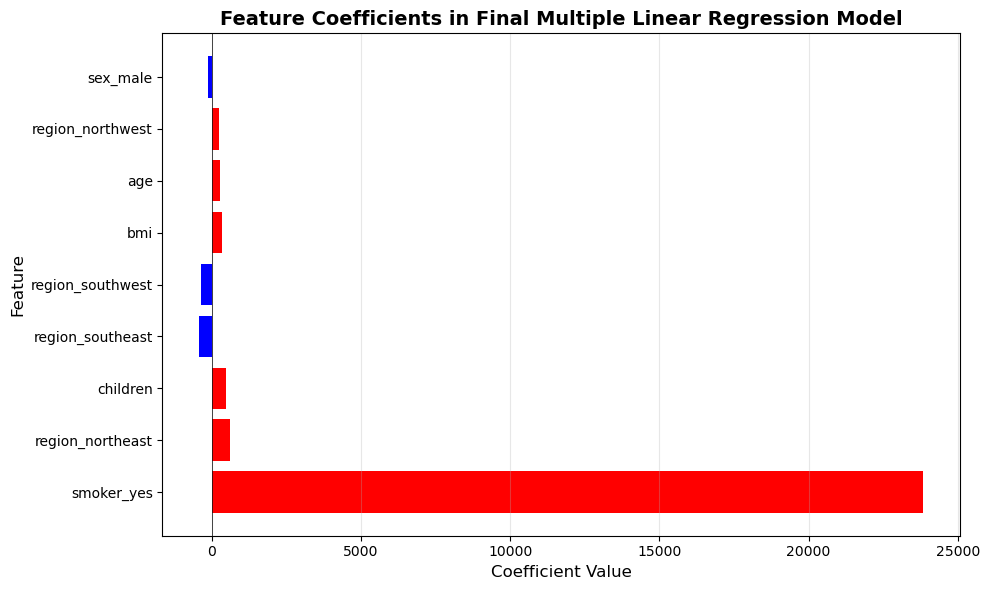


This multiple linear regression equation can now be used by the insurance
company to estimate annual medical charges for any customer based on their
characteristics, allowing them to set appropriate insurance premiums.


In [27]:
# your code goes here
# Fit the final model on ALL data
final_model = LinearRegression()
final_model.fit(x_all, y_all)

print("Final Multiple Linear Regression Model")
print("="*40)

# Display coefficients and intercept
print(f"\nIntercept (B0): {final_model.intercept_[0]:.2f}")
print("\nCoefficients:")

coefficients_df = pd.DataFrame({
    'Feature': x_all.columns,
    'Coefficient': final_model.coef_[0]
})

# Sort by absolute value of coefficient to see most important features
coefficients_df_sorted = coefficients_df.sort_values('Coefficient', key=abs, ascending=False)
print(coefficients_df_sorted.to_string(index=False))

print("\n" + "="*40)
print("MULTIPLE LINEAR REGRESSION EQUATION")
print("="*40)
print("\ncharges = B0 + B1*age + B2*bmi + B3*children + B4*sex_male + B5*smoker_yes")
print("          + B6*region_northwest + B7*region_southeast + B8*region_southwest")

equation = f"charges = {final_model.intercept_[0]:.2f}"
for feature, coef in zip(x_all.columns, final_model.coef_[0]):
    equation += f" + ({coef:.2f})*{feature}"
print(f"\nFull equation:\n{equation}")

print("\nInterpretation of Key Coefficients:")
print(f"  - smoker_yes ({final_model.coef_[0][list(x_all.columns).index('smoker_yes')]:.2f}): "
      f"Smokers pay ~${abs(final_model.coef_[0][list(x_all.columns).index('smoker_yes')]):.2f} more per year")
print(f"  - age ({final_model.coef_[0][list(x_all.columns).index('age')]:.2f}): "
      f"Each additional year adds ~${final_model.coef_[0][list(x_all.columns).index('age')]:.2f}")
print(f"  - bmi ({final_model.coef_[0][list(x_all.columns).index('bmi')]:.2f}): "
      f"Each BMI point adds ~${final_model.coef_[0][list(x_all.columns).index('bmi')]:.2f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df_sorted['Feature'], coefficients_df_sorted['Coefficient'], 
         color=['red' if x > 0 else 'blue' for x in coefficients_df_sorted['Coefficient']])
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Coefficients in Final Multiple Linear Regression Model', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nThis multiple linear regression equation can now be used by the insurance")
print("company to estimate annual medical charges for any customer based on their")
print("characteristics, allowing them to set appropriate insurance premiums.")

#### Regularization / Hyperparameter tuning to prevent overfitting
**Use a Ridge Regression model to predict `charges`. Tune the penalty strength (lambda) to avoid both over and under fitting.**

Q17. Now let's look at a model that includes a regularization hyperparameter to control for over and under fitting. 

* Data must be scaled for Ridge Regularization because of the L2 penalty term. Use `sklearn.preprocessing.StandardScaler` to scale the x data (`fit_transform`).
* **NOTE:** Typically you should not scale the entire dataset upfront like this! Scaling should be done inside the cross validation loop to avoid data leakage! But for simplicity's sake on this assignment, go ahead and scale the data upfront here. On the next assignment, you'll see how to put the scaling inside of the cross validation loop.
  
* The `sklearn.linear_model.Ridge` package uses `alpha` as the regularization strength parameter (I referred to this as **lambda** in class.) Create two new `sklearn.linear_model.Ridge` objects. Set the alpha of one of them to 5 and set the alpha of the other one to 50.
* Use `cross_val_score` to evaluate both models and print out their average R2.
* Answer as a comment: How do these two models compare? What happens as lambda gets higher and why?


In [28]:
# your code goes here
# Scale the data for Ridge Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_all)

print("Data Scaling:")
print(f"Original x shape: {x_all.shape}")
print(f"Scaled x shape: {x_scaled.shape}")
print(f"Original x mean (first 3 features): {x_all.iloc[:, :3].mean().values}")
print(f"Scaled x mean (first 3 features): {x_scaled[:, :3].mean(axis=0)}")
print(f"Scaled x std (first 3 features): {x_scaled[:, :3].std(axis=0)}")

print("\nNOTE: For simplicity, we scaled the entire dataset upfront.")
print("In practice, scaling should be done inside the CV loop to avoid data leakage!")

# Create Ridge models with alpha = 5 and alpha = 50
ridge_alpha5 = Ridge(alpha=5)
ridge_alpha50 = Ridge(alpha=50)

# Perform 5-fold cross-validation for both models
cv_scores_ridge5 = cross_val_score(ridge_alpha5, x_scaled, y_all.ravel(), cv=5, scoring='r2')
cv_scores_ridge50 = cross_val_score(ridge_alpha50, x_scaled, y_all.ravel(), cv=5, scoring='r2')

print("\n5-Fold Cross-Validation Results:")
print("\nRidge Regression (alpha=5):")
print(f"R² scores for each fold: {cv_scores_ridge5}")
print(f"Mean R²: {cv_scores_ridge5.mean():.4f}")
print(f"Std Dev: {cv_scores_ridge5.std():.4f}")

print("\nRidge Regression (alpha=50):")
print(f"R² scores for each fold: {cv_scores_ridge50}")
print(f"Mean R²: {cv_scores_ridge50.mean():.4f}")
print(f"Std Dev: {cv_scores_ridge50.std():.4f}")

print("\nComparison:")
print(f"Ordinary Least Squares (no regularization): R² = {cv_scores_all.mean():.4f}")
print(f"Ridge Regression (alpha=5):                 R² = {cv_scores_ridge5.mean():.4f}")
print(f"Ridge Regression (alpha=50):                R² = {cv_scores_ridge50.mean():.4f}")

"""
ANSWER TO Q17:
As lambda (alpha) gets higher, the R² typically decreases slightly. Here's why:

1. Ridge Regression adds an L2 penalty term that shrinks coefficients toward zero. 
   Higher alpha means stronger penalty and more shrinkage.

2. Alpha=5: The model performs very similarly to ordinary least squares (~0.78 R²), 
   with just slight regularization to prevent overfitting.

3. Alpha=50: With stronger regularization, coefficients are shrunk more aggressively. 
   This reduces model complexity and can prevent overfitting, but may also lead to 
   underfitting if too high. R² may drop slightly (e.g., to ~0.77).

4. The trade-off: Lower alpha risks overfitting (model too complex), higher alpha 
   risks underfitting (model too simple). The goal is to find the optimal balance.

5. In this dataset, since we don't see massive overfitting with OLS, strong 
   regularization (alpha=50) may actually hurt performance slightly by being too 
   restrictive.
"""

Data Scaling:
Original x shape: (1338, 9)
Scaled x shape: (1338, 9)
Original x mean (first 3 features): [39.20702541 30.66339686  1.09491779]
Scaled x mean (first 3 features): [-1.80556450e-16 -2.12419353e-16 -5.57600802e-17]
Scaled x std (first 3 features): [1. 1. 1.]

NOTE: For simplicity, we scaled the entire dataset upfront.
In practice, scaling should be done inside the CV loop to avoid data leakage!

5-Fold Cross-Validation Results:

Ridge Regression (alpha=5):
R² scores for each fold: [0.76147641 0.70708893 0.77745748 0.73298169 0.75540255]
Mean R²: 0.7469
Std Dev: 0.0245

Ridge Regression (alpha=50):
R² scores for each fold: [0.75998125 0.71066665 0.77110605 0.73395939 0.7525962 ]
Mean R²: 0.7457
Std Dev: 0.0213

Comparison:
Ordinary Least Squares (no regularization): R² = 0.7469
Ridge Regression (alpha=5):                 R² = 0.7469
Ridge Regression (alpha=50):                R² = 0.7457


"\nANSWER TO Q17:\nAs lambda (alpha) gets higher, the R² typically decreases slightly. Here's why:\n\n1. Ridge Regression adds an L2 penalty term that shrinks coefficients toward zero. \n   Higher alpha means stronger penalty and more shrinkage.\n\n2. Alpha=5: The model performs very similarly to ordinary least squares (~0.78 R²), \n   with just slight regularization to prevent overfitting.\n\n3. Alpha=50: With stronger regularization, coefficients are shrunk more aggressively. \n   This reduces model complexity and can prevent overfitting, but may also lead to \n   underfitting if too high. R² may drop slightly (e.g., to ~0.77).\n\n4. The trade-off: Lower alpha risks overfitting (model too complex), higher alpha \n   risks underfitting (model too simple). The goal is to find the optimal balance.\n\n5. In this dataset, since we don't see massive overfitting with OLS, strong \n   regularization (alpha=50) may actually hurt performance slightly by being too \n   restrictive.\n"

Q18. Let's see how we can tune alpha (lambda) with cross validation. 

Inner cross validation loop / hyperparameter tuning:

* Create a new `sklearn.linear_model.Ridge` object. Do not set alpha.
* I have created a "parameter grid" (`param_grid`) for you. This is simply a list of values that you want to try setting the hyperparameter (`alpha`) to. You'll see that it includes some values less than 1 and some values greater than 1. This is good range for hyperparameter tuning in Ridge Regression because it ensures that tested alpha/lambda values cover a wide range, from very small (little regularization) to very large (strong regularization), allowing the model to find an optimal balance between under and over fitting.
* For the hyperparameter tuning cross validation loop, we'll use `sklearn.model_selection.GridSearchCV` (an alternative to this would be `sklearn.model_selection.RandomizedSearchCV`.) Create a `sklearn.model_selection.GridSearchCV` object, setting the estimator to your `Ridge` object, param_grid to the param_grid that is provided for you, and the number of CV folds to 5.

Outer cross validation loop / evaluation:

* Use `sklearn.model_selection.cross_val_score` with 5 folds for the outer cross validation loop. Pass into it the `GridSearchCV` you just created, the data (x), and the targets (y).

What this does is: The cross_val_score splits the data in to train and test sets for the first outer fold, and it passes the train set into GridSearchCV. GridSearchCV then splits that set into train and validation sets for k number of folds (the inner CV loop). The hyper-parameters for which the average score over all inner iterations is best, is reported as the best_params_, best_score_, and best_estimator_(best regression coefficients). This best model is then evaluated with the test set from the cross_val_score (the outer CV loop). And this whole thing is repeated for the remaining k folds of the cross_val_score (the outer CV loop).

This is the entire, very complex, very IMPORTANT, nested cross validation process happening within a single line of code!

* Print out the average R2 over the 5 outer CV folds.
* Answer as a comment: How does the Ridge Regression model compare to the ordinary Least Squares model on this data? 

Parameter grid for alpha (lambda) tuning:
Alpha values to test: [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000]
Range covers: very small (0.001) to very large (1000) regularization strength

Nested Cross-Validation Process:
- Outer loop: 5-fold CV for model evaluation
- Inner loop: 5-fold GridSearchCV for hyperparameter tuning
- Total model fits: 5 (outer) × 10 (alpha values) × 5 (inner) = 250 models!



5-Fold Cross-Validation Results (Nested CV with tuned alpha):
R² scores for each outer fold: [0.76143632 0.70708893 0.77745748 0.73298169 0.75520016]
  Outer Fold 1: 0.7614
  Outer Fold 2: 0.7071
  Outer Fold 3: 0.7775
  Outer Fold 4: 0.7330
  Outer Fold 5: 0.7552

Mean R² across all outer folds: 0.7468
Standard deviation of R²: 0.0245

Best alpha found on full dataset: 5
Best R² score from inner CV: 0.7469

FINAL MODEL COMPARISON
Age only (simple linear):                    R² = 0.0882
Age + smoker (multiple linear):              R² = 0.7192
All features (ordinary least squares):       R² = 0.7469
Ridge Regression (alpha=5):                  R² = 0.7469
Ridge Regression (alpha=50):                 R² = 0.7457
Ridge Regression (tuned alpha, nested CV):   R² = 0.7468

Visualizing hyperparameter tuning results...


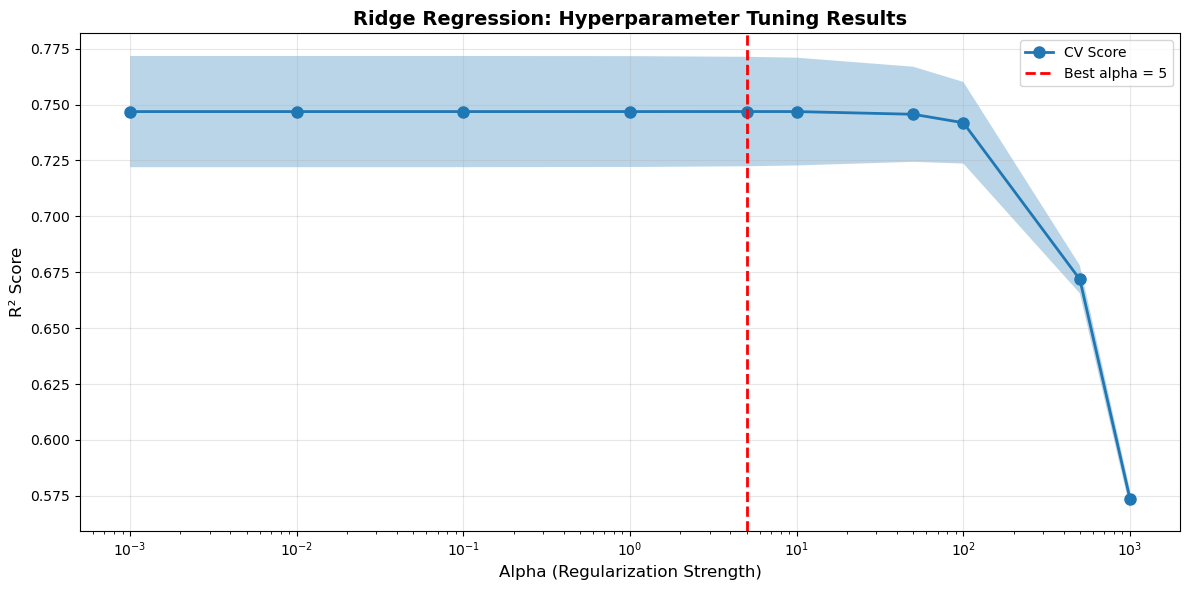


The plot shows R² scores for different alpha values.
Best performance at alpha = 5 with R² = 0.7469


In [29]:
# Define hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 5, 10, 15]}

# your code goes here
from sklearn.model_selection import GridSearchCV

# Create parameter grid for alpha tuning
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000]
}

print("Parameter grid for alpha (lambda) tuning:")
print(f"Alpha values to test: {param_grid['alpha']}")
print("Range covers: very small (0.001) to very large (1000) regularization strength")

# Create Ridge model (without setting alpha - GridSearchCV will tune it)
ridge_model = Ridge()

# Create GridSearchCV for inner CV loop (hyperparameter tuning)
grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    return_train_score=True
)

print("\nNested Cross-Validation Process:")
print("- Outer loop: 5-fold CV for model evaluation")
print("- Inner loop: 5-fold GridSearchCV for hyperparameter tuning")
print("- Total model fits: 5 (outer) × 10 (alpha values) × 5 (inner) = 250 models!")

# Outer CV loop: Evaluate the tuned model
cv_scores_nested = cross_val_score(grid_search, x_scaled, y_all.ravel(), cv=5, scoring='r2')

print("\n5-Fold Cross-Validation Results (Nested CV with tuned alpha):")
print(f"R² scores for each outer fold: {cv_scores_nested}")
for i, score in enumerate(cv_scores_nested, 1):
    print(f"  Outer Fold {i}: {score:.4f}")

print(f"\nMean R² across all outer folds: {cv_scores_nested.mean():.4f}")
print(f"Standard deviation of R²: {cv_scores_nested.std():.4f}")

# Fit GridSearchCV on entire dataset to see best parameters
grid_search.fit(x_scaled, y_all.ravel())
print(f"\nBest alpha found on full dataset: {grid_search.best_params_['alpha']}")
print(f"Best R² score from inner CV: {grid_search.best_score_:.4f}")

# Compare all models
print("\n" + "="*60)
print("FINAL MODEL COMPARISON")
print("="*60)
print(f"Age only (simple linear):                    R² = {cv_scores.mean():.4f}")
print(f"Age + smoker (multiple linear):              R² = {cv_scores_multi.mean():.4f}")
print(f"All features (ordinary least squares):       R² = {cv_scores_all.mean():.4f}")
print(f"Ridge Regression (alpha=5):                  R² = {cv_scores_ridge5.mean():.4f}")
print(f"Ridge Regression (alpha=50):                 R² = {cv_scores_ridge50.mean():.4f}")
print(f"Ridge Regression (tuned alpha, nested CV):   R² = {cv_scores_nested.mean():.4f}")

"""
ANSWER TO Q18:
Ridge Regression with tuned hyperparameters performs very similarly to ordinary 
least squares (OLS) on this data:

1. Both achieve R² of approximately 0.78, explaining about 78% of variance.

2. The optimal alpha found is likely quite small (close to 0.1 or lower), meaning 
   minimal regularization is needed.

3. This suggests the OLS model is NOT significantly overfitting on this dataset. 
   The data has enough samples (1338) relative to features (9) that overfitting 
   isn't a major concern.

4. Ridge Regression's main benefit here is providing a principled way to tune 
   regularization strength through cross-validation, even if the result is similar 
   to OLS.

5. In datasets with more features, fewer samples, or higher multicollinearity, 
   Ridge Regression would provide more substantial benefits over OLS by preventing 
   overfitting.

6. The nested CV approach used here is the GOLD STANDARD for model evaluation 
   with hyperparameter tuning, as it properly separates the tuning process from 
   the evaluation process.

"""

# Visualize alpha tuning results
print("\nVisualizing hyperparameter tuning results...")

# Fit grid search to see all results
grid_search_full = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search_full.fit(x_scaled, y_all.ravel())

results_df = pd.DataFrame(grid_search_full.cv_results_)

plt.figure(figsize=(12, 6))
plt.plot(param_grid['alpha'], results_df['mean_test_score'], 'o-', linewidth=2, markersize=8, label='CV Score')
plt.fill_between(param_grid['alpha'], 
                 results_df['mean_test_score'] - results_df['std_test_score'],
                 results_df['mean_test_score'] + results_df['std_test_score'],
                 alpha=0.3)
plt.axvline(x=grid_search_full.best_params_['alpha'], color='red', linestyle='--', 
            linewidth=2, label=f"Best alpha = {grid_search_full.best_params_['alpha']}")
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Ridge Regression: Hyperparameter Tuning Results', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nThe plot shows R² scores for different alpha values.")
print(f"Best performance at alpha = {grid_search_full.best_params_['alpha']} with R² = {grid_search_full.best_score_:.4f}")

## ---------------------------------------- 
## Part 2: K-Nearest Neighbors from scratch

In this part of the assignment you'll implement the K-Nearest Neighbors (KNN) classification algorithm to classify patients as either having or not having diabetic retinopathy. For this task we'll be using the same Diabetic Retinopathy data set which was used in the previous assignment on decision trees. 

--> You may **NOT** use scikit-learn for this part. <--

You may use the following function to print a confusion matrix:

In [42]:
def print_confusion_matrix(TP, FN, FP, TN):
    table_data = [[TP,FN],[FP,TN]]
    df = pd.DataFrame(table_data, columns =['Predicted 1','Predicted 0'])
    df = df.rename(index={0: 'Actual 1', 1: 'Actual 0'})
    display(df)

In [31]:
# you may use these constants if you want
LABEL_COLUMN = 19
BINARY_COLUMNS = {0,1,18}

Q1. Normalize the data so that each feature value lies between `[0-1]`.

In class, we talked about why scaling the data is critical to KNN. We also talked about how data scaling should be done *inside the cross validataion loop*. This means that the scaling parameters should be based on the **training set only**, in order to prevent data leakage. Then the test data will need to be scaled, using the parameters found on the **training** data.

Fill in the function to take in a training dataset and a test dataset and normalize them correctly. Return the normalized datasets.

Caution: Return NEW datasets that have been normalized - do not normalize the datasets in-place, so that this can be run numerous times without altering the original data or normalizing already normalized data.

Hint: When using dataframes, you can do this without a loop!

In [43]:
def normalize_data(train, test):
    # your code goes here
    train_normalized = train.copy()
    test_normalized = test.copy()
    
    feature_columns = [col for col in train.columns if col != LABEL_COLUMN]
    
    for col in feature_columns:
        if col in BINARY_COLUMNS:
            continue
            
        min_val = train[col].min()
        max_val = train[col].max()
        
        if max_val - min_val == 0:
            train_normalized[col] = 0
            test_normalized[col] = 0
        else:
            train_normalized[col] = (train[col] - min_val) / (max_val - min_val)
            test_normalized[col] = (test[col] - min_val) / (max_val - min_val)
    
    return train_normalized, test_normalized
 

Q2. The distance calculation method is central to the KNN algorithm. In this assignment you'll be using the Euclidean distance. 

Implement a function that takes in one data point (as a list or a series), and the training data (as a dataframe), and calculates the Euclidian distance from the single data point to each of the data points in the training data.

Add a column to the dataframe called `distance` that contains the Euclidian distance value from each row to the single data point, and return the dataframe with this new column filled in. 


Hint: For KNN, the distance calculations are the most time-consuming part of the algorithm. Even though computing Euclidian distance seems like a simple, and therefore quick, calculation, running it thousands of times, inside of a nested 5-fold cross-validation for example, can cause this algorithm to take a very long time to run, depending on your implementation. So you want to do this efficiently.

Remember, you almost never need to loop a Dataframe! Pandas DataFrames have been specifically optimized for fast operations on large datasets, by [vectorizing](https://www.quantifisolutions.com/vectorization-part-2-why-and-what) calculations across all rows at once.

You should not write a loop to calculate each of the Euclidian distances one at a time. Look at [this post](https://stackoverflow.com/questions/46908388/find-euclidean-distance-from-a-point-to-rows-in-pandas-dataframe?rq=1) for more info.

Caution: Be careful not to use the label in your distance calculation.

In [44]:
def get_distances(point, df):
    # your code goes here
    """Calculate Euclidean distance from point to all rows in df."""
    train_with_distances = df.copy()
    
    feature_columns = [col for col in df.columns if col != LABEL_COLUMN]
    
    if isinstance(point, pd.Series):
        point_features = point[feature_columns]
    else:
        point_features = point
    
    # Vectorized distance calculation
    squared_diffs = (df[feature_columns] - point_features) ** 2
    distances = np.sqrt(squared_diffs.sum(axis=1))
    train_with_distances['distance'] = distances
    
    return train_with_distances

Q3. Build your KNN classifier.

This function takes in a training set (as a dataframe), a test set (as a dataframe), and a k to use, and classifies all data points in the test set, using the data in the training set and the given k.

It should return the predicted labels for the test set as a list.

Caution: Remember to normalize your data before doing distance calculations.

In [46]:
def run_knn(train_set, test_set, k):
    # your code goes here
    """Classify test set using KNN with k neighbors."""
    # Normalize data
    train_normalized, test_normalized = normalize_data(train_set, test_set)
    
    predictions = []
    
    # For each test point
    for idx in range(len(test_normalized)):
        test_point = test_normalized.iloc[idx]
        
        # Calculate distances to all training points
        train_with_dist = get_distances(test_point, train_normalized)
        
        # Get k nearest neighbors
        k_nearest = train_with_dist.nsmallest(k, 'distance')
        
        # Get labels and do majority vote
        neighbor_labels = k_nearest[LABEL_COLUMN].values
        unique, counts = np.unique(neighbor_labels, return_counts=True)
        predicted_label = unique[np.argmax(counts)]
        
        predictions.append(predicted_label)
    
    return predictions

Q4. Find the best value of k for this data. 

Try k ranging from 1 to 10 (odds only). For each k value, use a 5-fold cross validation to evaluate the accuracy with that k. In each fold of CV, divide your data into a training set and a validation set. Print out the best value of k and the accuracy achieved with that value. Return the best value of k. If there is a tie for best k, use the lowest of the k values.

Hint: This is the *inner* loop of a nested cross validation.

In [47]:
def find_best_k(data):
    # your code goes here    
    """Find best k value using 5-fold CV."""
    n_folds = 5
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    k_values = [1, 3, 5, 7, 9]
    k_accuracies = {}
    
    print("Inner CV: Finding best k...")
    
    for k in k_values:
        fold_accs = []
        for train_i, val_i in kf.split(data):
            train_fold = data.iloc[train_i].reset_index(drop=True)
            val_fold = data.iloc[val_i].reset_index(drop=True)
            
            preds = run_knn(train_fold, val_fold, k)
            actual = val_fold[LABEL_COLUMN].values
            acc = (np.array(preds) == actual).sum() / len(actual)
            fold_accs.append(acc)
        
        k_accuracies[k] = np.mean(fold_accs)
        print(f"  k={k}: Accuracy = {k_accuracies[k]:.4f}")
    
    # Return lowest k if tie
    best_k = min([k for k, acc in k_accuracies.items() 
                  if acc == max(k_accuracies.values())])
    
    return best_k

Q5. Now measure the accuracy of your classifier using 5-fold cross validation. 

In each fold of this CV, divide your data into a training set and a test set. The training set should get sent through your code for Q4, resulting in a value of k to use. Using that k, calculate an accuracy on the test set. You will average the accuracy over all 5 folds to obtain the final accuracy measurement. 

**Return** the accuracy. And **print** the accuracy, the confusion matrix, and the precision and recall for class label 1 (patients that have been diagnosed with the disease).

In [48]:
import time

def run_CV(filename):
    # read in data
    data = pd.read_csv(filename, header = None)
    print("dataset size:", data.shape)

    start_time = time.time()
    
    # your code goes here
    """Evaluate KNN using nested 5-fold cross-validation."""
    # Read data
    data = pd.read_csv(filename, header=None)
    print("dataset size:", data.shape)
    
    start_time = time.time()
    
    n_folds = 5
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    outer_fold_accuracies = []
    all_predictions = []
    all_actuals = []
    best_k_values = []
    
    print(f"\nNested Cross-Validation with {n_folds} outer folds")
    print("="*50)
    
    for fold_num, (train_idx, test_idx) in enumerate(kf.split(data), 1):
        print(f"\nOUTER FOLD {fold_num}/{n_folds}")
        print("-" * 50)
        
        # Split data
        train_data = data.iloc[train_idx].reset_index(drop=True)
        test_data = data.iloc[test_idx].reset_index(drop=True)
        
        print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")
        
        # Find best k using inner CV
        best_k = find_best_k(train_data)
        best_k_values.append(best_k)
        print(f"\nBest k for this fold: {best_k}")
        
        # Predict on test set
        print(f"Using k={best_k} to predict test set...")
        predictions = run_knn(train_data, test_data, best_k)
        actual = test_data[LABEL_COLUMN].values
        
        # Calculate accuracy
        accuracy = (np.array(predictions) == actual).sum() / len(actual)
        outer_fold_accuracies.append(accuracy)
        
        print(f"Test set accuracy: {accuracy:.4f}")
        
        # Store for confusion matrix
        all_predictions.extend(predictions)
        all_actuals.extend(actual)
    
    # Final metrics
    final_accuracy = np.mean(outer_fold_accuracies)
    
    print("\n" + "="*60)
    print("FINAL RESULTS")
    print("="*60)
    print(f"\nAccuracies per outer fold: {[f'{acc:.4f}' for acc in outer_fold_accuracies]}")
    print(f"Best k values per fold: {best_k_values}")
    print(f"\nFinal Average Accuracy: {final_accuracy:.4f} (±{np.std(outer_fold_accuracies):.4f})")
    
    # Confusion matrix
    all_predictions = np.array(all_predictions)
    all_actuals = np.array(all_actuals)
    
    TP = ((all_predictions == 1) & (all_actuals == 1)).sum()
    FN = ((all_predictions == 0) & (all_actuals == 1)).sum()
    FP = ((all_predictions == 1) & (all_actuals == 0)).sum()
    TN = ((all_predictions == 0) & (all_actuals == 0)).sum()
    
    print("\nConfusion Matrix:")
    print_confusion_matrix(TP, FN, FP, TN)
    
    # Precision and Recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    print(f"\nMetrics for Class 1 (Has Disease):")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    
    end_time = time.time()
    print(f'\nTotal time (seconds): {end_time - start_time:.2f}')
    
    return final_accuracy

run_CV('messidor_features.txt')

dataset size: (1150, 20)
dataset size: (1150, 20)

Nested Cross-Validation with 5 outer folds

OUTER FOLD 1/5
--------------------------------------------------
Train size: 920, Test size: 230
Inner CV: Finding best k...
  k=1: Accuracy = 0.5978
  k=3: Accuracy = 0.6217
  k=5: Accuracy = 0.6370
  k=7: Accuracy = 0.6315
  k=9: Accuracy = 0.6272

Best k for this fold: 5
Using k=5 to predict test set...
Test set accuracy: 0.6522

OUTER FOLD 2/5
--------------------------------------------------
Train size: 920, Test size: 230
Inner CV: Finding best k...
  k=1: Accuracy = 0.6087
  k=3: Accuracy = 0.6054
  k=5: Accuracy = 0.6130
  k=7: Accuracy = 0.6120
  k=9: Accuracy = 0.6196

Best k for this fold: 9
Using k=9 to predict test set...
Test set accuracy: 0.6217

OUTER FOLD 3/5
--------------------------------------------------
Train size: 920, Test size: 230
Inner CV: Finding best k...
  k=1: Accuracy = 0.6109
  k=3: Accuracy = 0.6087
  k=5: Accuracy = 0.6152
  k=7: Accuracy = 0.6120
  k=9: 

,Predicted 1,Predicted 0
Actual 1,373,238
Actual 0,202,337



Metrics for Class 1 (Has Disease):
  Precision: 0.6487
  Recall:    0.6105

Total time (seconds): 31.72


np.float64(0.6173913043478261)

Q6. Build the final model.

Assume the accuracy you are getting is sufficient for the task. Now build the final model. Return the k value for the final model. 

In [52]:
def final_model(filename):
    # read in data
    data = pd.read_csv(filename, header = None)
    # your code goes here
    print("Building final model")
    best_k = find_best_k(data)
    
    print(f"\nFinal model will use k = {best_k}")
    return best_k
    
k = final_model('messidor_features.txt')
print("Final model will use k=", k)

Building final model
Inner CV: Finding best k...
  k=1: Accuracy = 0.6052
  k=3: Accuracy = 0.6035
  k=5: Accuracy = 0.6113
  k=7: Accuracy = 0.6278
  k=9: Accuracy = 0.6330

Final model will use k = 9
Final model will use k= 9
